# <center>LUXURY WATCH PRICE INTEX

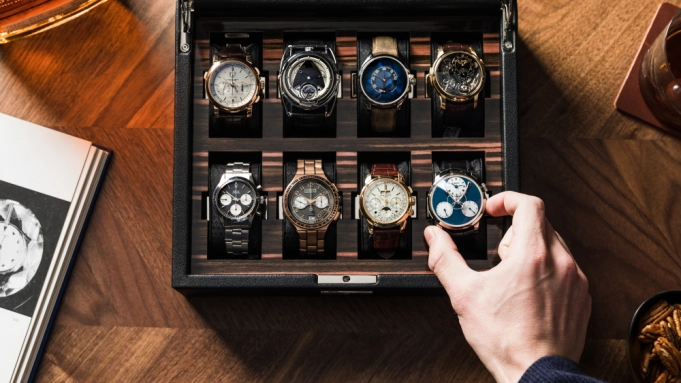

# .

###           This project work contains information about luxury watch models from various brands, including their prices, case and strap materials, movement types, water resistance levels, and additional details such as case diameter, case thickness, band width, dial color, crystal material, complications, and power reserve. The data is useful for individuals interested in luxury watches, including watch collectors, enthusiasts, and retailers.

# 


# Column Details

• Brand: The brand of the watch.

• Model: The model name or number of the watch.

• Case Material: The material used to make the watch case (e.g., stainless steel, titanium, gold).

• Strap Material: The material used to make the watch strap or bracelet (e.g., leather, rubber, metal).

• Movement Type: The type of movement used in the watch (e.g., automatic, manual, quartz).

• Water Resistance: The level of water resistance for the watch (e.g., 30 meters, 100 meters, 600 meters).

• Case Diameter (mm): The diameter of the watch case in millimeters.

• Case Thickness (mm): The thickness of the watch case in millimeters.

• Band Width (mm): The width of the watch strap or bracelet in millimeters.

• Dial Color: The color of the watch dial (e.g., black, blue, silver).

• Crystal Material: The material used for the watch crystal (e.g., sapphire, mineral, hardlex).

• Complications: Any additional functions or features beyond timekeeping (e.g., date display, chronograph, GMT).

• Power_Reserve: The amount of time the watch can run without winding or wearing (e.g., 48 hours, 72 hours).

• Price_(USD): The retail price of the watch in US dollars.



.

#  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR


In [3]:
wt=pd.read_csv('Luxury watch.csv')
wt

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power_Reserve,Price_ USD
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,"4,200"
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,"7,900"
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,None,NaN,"2,800"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,18k Rose Gold,Leather,Automatic,30 meters,38.5,8.25,20.0,White,Sapphire,Date,38 hours,"21,500"
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300 meters,45.0,15.50,23.0,Black,Sapphire,Date,120 hours,"13,500"
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30 meters,38.5,9.70,20.0,Blue,Sapphire,Date,64 hours,"1,800"
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150 meters,41.5,11.00,22.0,Blue,Sapphire,Date,40 hours,"19,000"


In [4]:
wt.shape

(507, 14)

# <CENTER> E D A

In [5]:
wt.describe()

,Case Diameter (mm),Case Thickness (mm),Band Width (mm)
count,507.000000,507.000000,507.000000
mean,41.046154,11.588343,21.105523
std,2.535339,2.491481,1.658375
min,27.500000,5.000000,15.000000
25%,40.000000,9.800000,20.000000
50%,41.000000,12.000000,20.000000
75%,42.000000,13.300000,22.000000
max,46.500000,17.500000,28.000000


In [6]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    object 
 3   Strap Material       507 non-null    object 
 4   Movement Type        507 non-null    object 
 5   Water Resistance     507 non-null    object 
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    object 
 10  Crystal Material     507 non-null    object 
 11  Complications        507 non-null    object 
 12  Power_Reserve        493 non-null    object 
 13  Price_ USD           506 non-null    object 
dtypes: float64(3), object(11)
memory usage: 55.6+ KB


In [7]:
wt.isnull().mean()*100

Brand                  0.000000
Model                  0.000000
Case Material          0.000000
Strap Material         0.000000
Movement Type          0.000000
Water Resistance       0.000000
Case Diameter (mm)     0.000000
Case Thickness (mm)    0.000000
Band Width (mm)        0.000000
Dial Color             0.000000
Crystal Material       0.000000
Complications          0.000000
Power_Reserve          2.761341
Price_ USD             0.197239
dtype: float64

In [8]:
# checking how many defferent Brands are in the data

In [9]:
wt.Brand.unique()

array(['Rolex', 'Omega', 'Tag Heuer', 'Breitling', 'Cartier',
       'Jaeger-LeCoultre', 'Seiko', 'Citizen', 'Tissot', 'Hamilton',
       'Longines', 'Oris', 'Bell & Ross', 'Sinn', 'Breguet',
       'Audemars Piguet', 'Vacheron Constantin', 'Panerai', 'Tudor',
       'IWC', 'Montblanc', 'Blancpain', 'Zenith', 'Piaget',
       'Ulysse Nardin', 'Jaquet Droz', 'Bulgari', 'Chopard',
       'Girard-Perregaux', 'Glashütte Original', 'Hublot',
       'Patek Philippe', 'Bulova', 'A. Lange & Sohne', 'Rado',
       'Frederique Constant', 'TAG Heuer', 'Baume & Mercier',
       'A. Lange & Söhne'], dtype=object)

In [10]:
# checking nan values at the data

In [11]:
wt.isna().sum()*100

Brand                     0
Model                     0
Case Material             0
Strap Material            0
Movement Type             0
Water Resistance          0
Case Diameter (mm)        0
Case Thickness (mm)       0
Band Width (mm)           0
Dial Color                0
Crystal Material          0
Complications             0
Power_Reserve          1400
Price_ USD              100
dtype: int64

In [12]:
# clearing the nan values

In [13]:
wt.dropna(inplace=True)

In [14]:
wt

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power_Reserve,Price_ USD
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,"4,200"
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,"7,900"
5,Jaeger-LeCoultre,Reverso,Stainless Steel,Leather,Manual,30 meters,42.9,9.20,20.0,Black,Sapphire,None,45 hours,"5,500"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,18k Rose Gold,Leather,Automatic,30 meters,38.5,8.25,20.0,White,Sapphire,Date,38 hours,"21,500"
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300 meters,45.0,15.50,23.0,Black,Sapphire,Date,120 hours,"13,500"
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30 meters,38.5,9.70,20.0,Blue,Sapphire,Date,64 hours,"1,800"
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150 meters,41.5,11.00,22.0,Blue,Sapphire,Date,40 hours,"19,000"


In [15]:
wt.Power_Reserve.unique()

array(['48 hours', '60 hours', '42 hours', '70 hours', '45 hours',
       '50 hours', '270 days', '38 hours', '80 hours', '64 hours',
       '40 hours', '56 hours', '120 hours', '68 hours', '54 hours',
       '46 hours', '72 hours', '44 hours', '210 days', '65 hours',
       '43 hours', '41 hours', '55 hours', '168 hours'], dtype=object)

In [16]:
## removing sting values from colums for making the colums data type int

In [17]:
wt['Power_Reserve']=wt['Power_Reserve'].str.replace('days','')
wt['Power_Reserve']=wt['Power_Reserve'].str.replace('hours','')
wt['Price_ USD'] = wt['Price_ USD'].str.replace(',','')
wt['Water Resistance']=wt['Water Resistance'].str.replace('meters','')
wt['Water Resistance']=wt['Water Resistance'].astype(int)

In [18]:
## changing data type of the columns for EDA

In [19]:
wt['Power_Reserve']=wt['Power_Reserve'].astype(int)
wt['Price_ USD']=wt['Price_ USD'].astype(int)

In [20]:
## renaming the columns and giving '_' on spaces for degrees the errors while programming

In [21]:
wt.rename(columns={'Price_ USD':'Price'}, inplace=True)
wt.rename(columns={'Case Material':'Case_Material'},inplace=True)
wt.rename(columns={'Case Diameter (mm)':'Case_Diameter_in_mm'},inplace=True)
wt.rename(columns={'Case Thickness (mm)':'Case_Thickness_in_mm'},inplace=True)
wt.rename(columns={'Band Width (mm)':'Band_Width_in_mm'},inplace=True)
wt.rename(columns={'Movement Type':'Movement_Type'},inplace=True)
wt.rename(columns={'Dial Color':'Dial_Color'},inplace=True)
wt.rename(columns={'Crystal Material':'Crystal_Material'},inplace=True)
wt.rename(columns={'Strap Material':'Strap_Material'},inplace=True)
wt.rename(columns={'Water Resistance':'Water_Resistance'},inplace=True)



In [22]:
wt

,Brand,Model,Case_Material,Strap_Material,Movement_Type,Water_Resistance,Case_Diameter_in_mm,Case_Thickness_in_mm,Band_Width_in_mm,Dial_Color,Crystal_Material,Complications,Power_Reserve,Price
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300,40.0,13.00,20.0,Black,Sapphire,Date,48,9500
1,Omega,Seamaster,Titanium,Rubber,Automatic,600,43.5,14.47,21.0,Blue,Sapphire,Date,60,5800
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100,41.0,13.00,20.0,White,Sapphire,Chronograph,42,4200
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30,43.0,14.25,22.0,Black,Sapphire,Chronograph,70,7900
5,Jaeger-LeCoultre,Reverso,Stainless Steel,Leather,Manual,30,42.9,9.20,20.0,Black,Sapphire,None,45,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,18k Rose Gold,Leather,Automatic,30,38.5,8.25,20.0,White,Sapphire,Date,38,21500
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300,45.0,15.50,23.0,Black,Sapphire,Date,120,13500
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30,38.5,9.70,20.0,Blue,Sapphire,Date,64,1800
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150,41.5,11.00,22.0,Blue,Sapphire,Date,40,19000


In [23]:
wt.Movement_Type.unique()

array(['Automatic', 'Manual', 'Eco-Drive'], dtype=object)

In [236]:
## giving int atributte to string unique values

In [237]:
wt.Movement_Type.replace({
    'Automatic':1,
    'Manual':2,
    'Eco-Drive':3
},inplace=True)
wt['Movement_Type']=wt['Movement_Type'].astype(int)
    

In [238]:
wt

,Brand,Model,Case_Material,Strap_Material,Movement_Type,Water_Resistance,Case_Diameter_in_mm,Case_Thickness_in_mm,Band_Width_in_mm,Dial_Color,Crystal_Material,Complications,Power_Reserve,Price
0,Rolex,Submariner,Stainless Steel,Stainless Steel,1,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48,9500
1,Omega,Seamaster,Titanium,Rubber,1,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60,5800
2,Tag Heuer,Carrera,Stainless Steel,Leather,1,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42,4200
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,1,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70,7900
5,Jaeger-LeCoultre,Reverso,Stainless Steel,Leather,2,30 meters,42.9,9.20,20.0,Black,Sapphire,None,45,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,18k Rose Gold,Leather,1,30 meters,38.5,8.25,20.0,White,Sapphire,Date,38,21500
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,1,300 meters,45.0,15.50,23.0,Black,Sapphire,Date,120,13500
504,Longines,Master Collection,Stainless Steel,Leather,1,30 meters,38.5,9.70,20.0,Blue,Sapphire,Date,64,1800
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,1,150 meters,41.5,11.00,22.0,Blue,Sapphire,Date,40,19000


In [239]:
wt.shape

(492, 14)

In [240]:
## filling nan values of pricr with mean of the colum

In [241]:
wt.Price.fillna(wt.Price.mean(),inplace=True)

# <CENTER> GRAPHICAL  VISUALIZATION 

### .



In [ ]:
# Wtches price intex of sum popular Brands

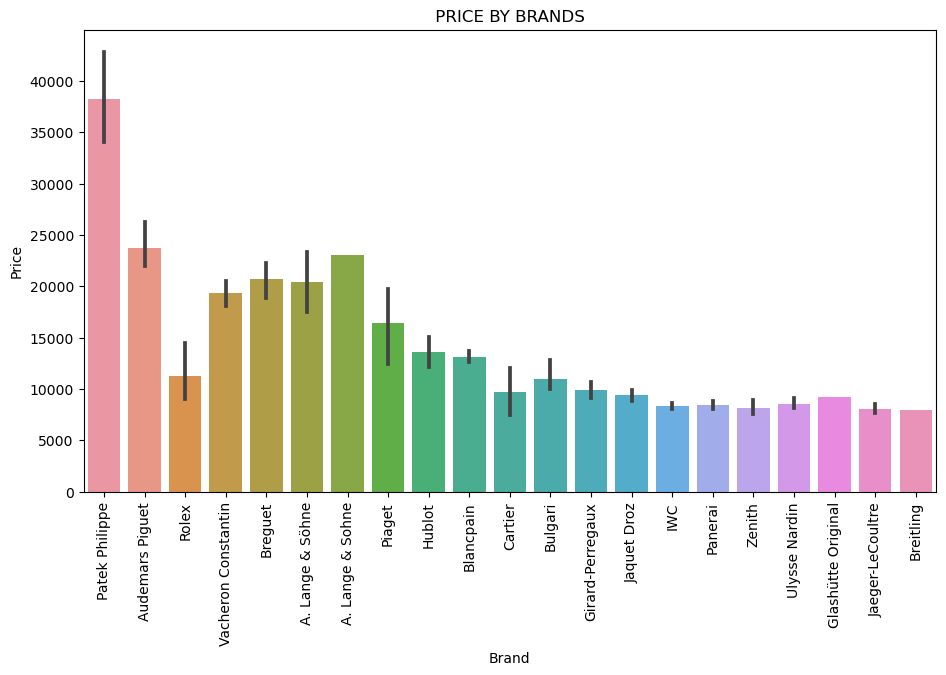

In [61]:
plt.figure(figsize=(11,6))
sns.barplot(x='Brand',y='Price',data=wt.sort_values(by='Price',ascending=False)[:300])
plt.xticks(rotation=90)
plt.title(' PRICE BY BRANDS ')
plt.show()

In [ ]:
# TOP BRANDS AND THIRE PRICE

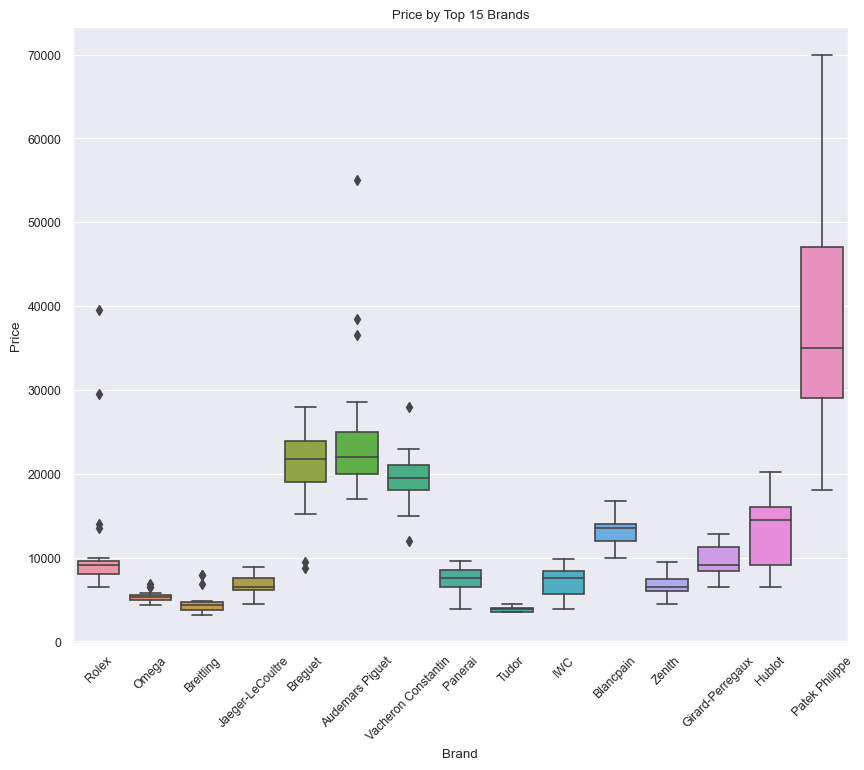

In [30]:
plt.figure(figsize=(10, 8)) 
top_brands = wt['Brand'].value_counts().nlargest(15).index.tolist() 
sns.boxplot(x='Brand', y='Price', data=wt[wt['Brand'].isin(top_brands)]) 
plt.xticks(rotation=45)
plt.title('Price by Top 15 Brands')
plt.show()

### .



## <CENTER> COUNTS OF OBJECTS IN THE TABLE

In [26]:
# THIRE SHOWING THE COUNT OF THE OBJUCT VALUES LIKE MODEL,STRAP MATERIAL,ETC..

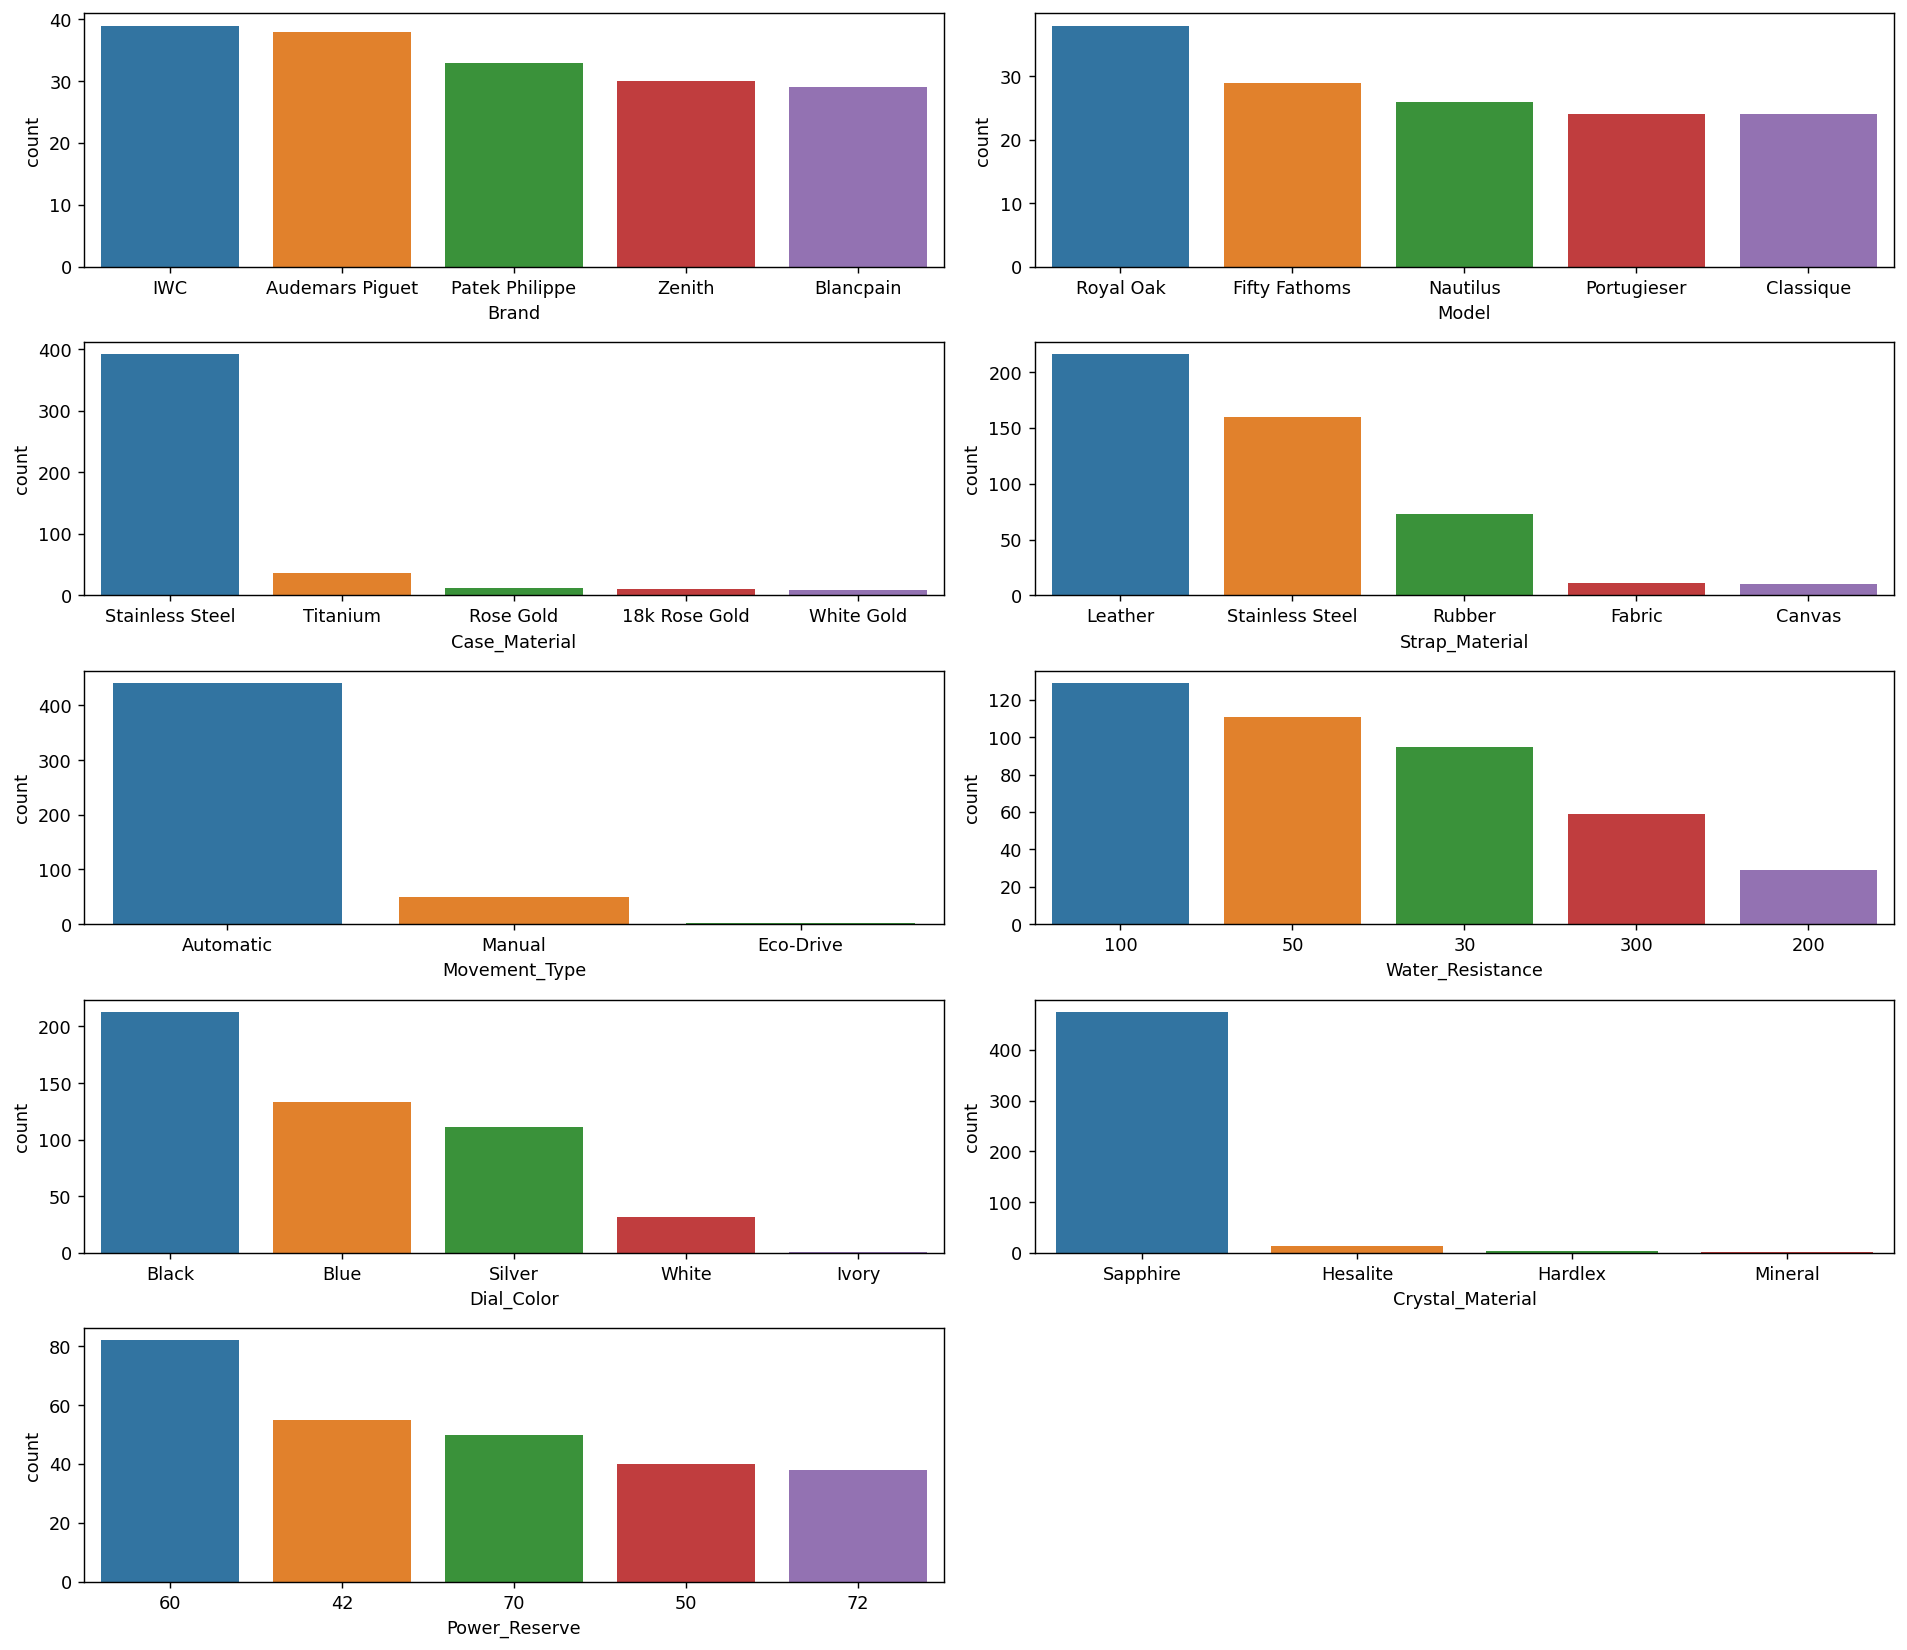

In [25]:
col = ['Brand','Model','Case_Material','Strap_Material','Movement_Type','Water_Resistance','Dial_Color','Crystal_Material','Power_Reserve']
fig,ax = plt.subplots(dpi=128, figsize=(15,13))
plt.title(' COUNTS OF ALL OBJECT TYPES ')
for num,i in enumerate(col,1):
    plt.subplot(5,2,num)
    sns.countplot(x=wt[i],data=wt,order=wt[i].value_counts().head().index)
plt.tight_layout()
plt.show()

#  

In [ ]:
# watchs power capacity by brands

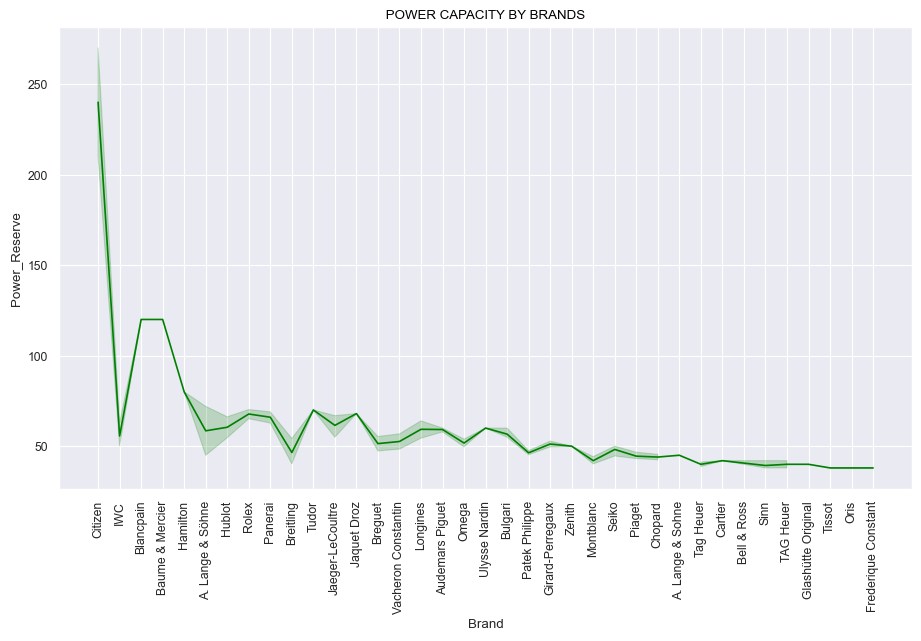

In [28]:
plt.figure(figsize=(11,6))
sns.set_style('dark')
sns.set_theme('paper')
sns.lineplot(x='Brand',y='Power_Reserve',data=wt.sort_values(by='Power_Reserve',ascending=False),color='green')
plt.xticks(rotation=90)
plt.title((' POWER CAPACITY BY BRANDS '),color='black')
plt
plt.show()

### .




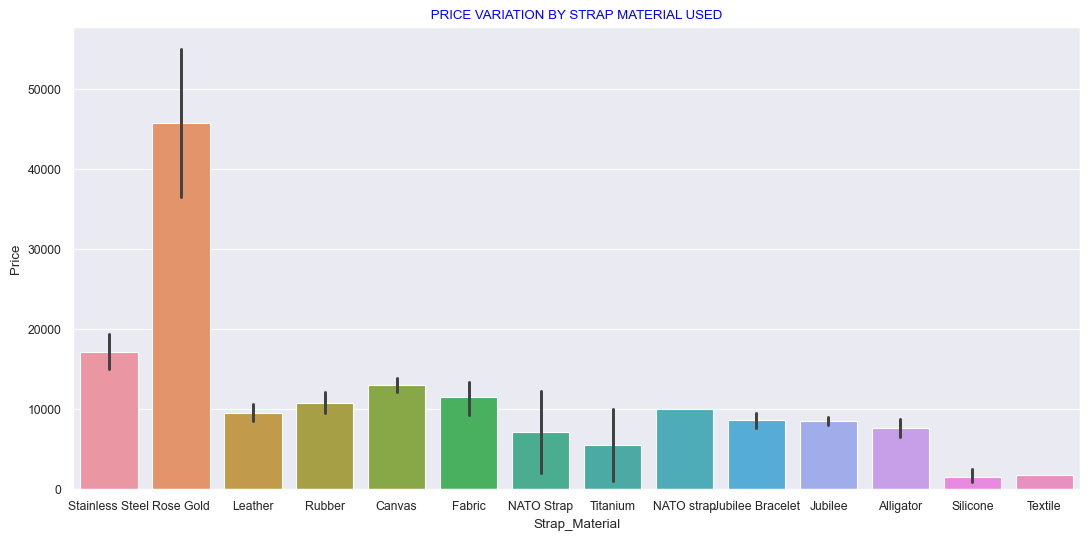

In [33]:
plt.figure(figsize=(13,6))
sns.set_color_codes()
sns.set_palette('copper_r')
sns.barplot(x='Strap_Material',y='Price',data=wt.sort_values(by='Price',ascending=False))
plt.title((' PRICE VARIATION BY STRAP MATERIAL USED '),color='blue')
plt.show()

### .

In [151]:
# showing how much Movement Type is used in watches

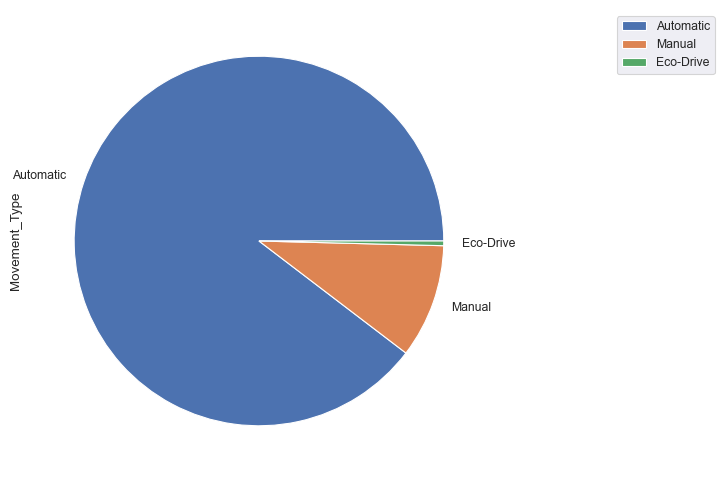

In [31]:
myexplodde=[0,0.1]
plt.figure(figsize=(6,6))
wt.Movement_Type.value_counts().plot.pie();
plt.legend(bbox_to_anchor=(1.5,1))


In [ ]:
# dail color relation with target price

Text(0.5, 1.0, 'dail color by price')

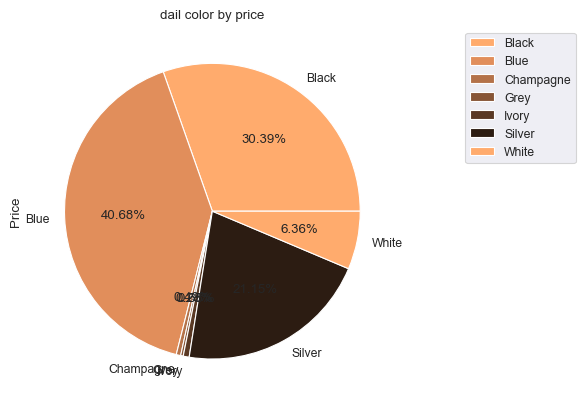

In [38]:
plt.title('')
colorprice=wt.groupby(['Dial_Color'])['Price'].sum()
colorprice.plot.pie(autopct='%1.2f%%');
plt.legend(bbox_to_anchor=(1.5,1))
plt.title('dail color by price')

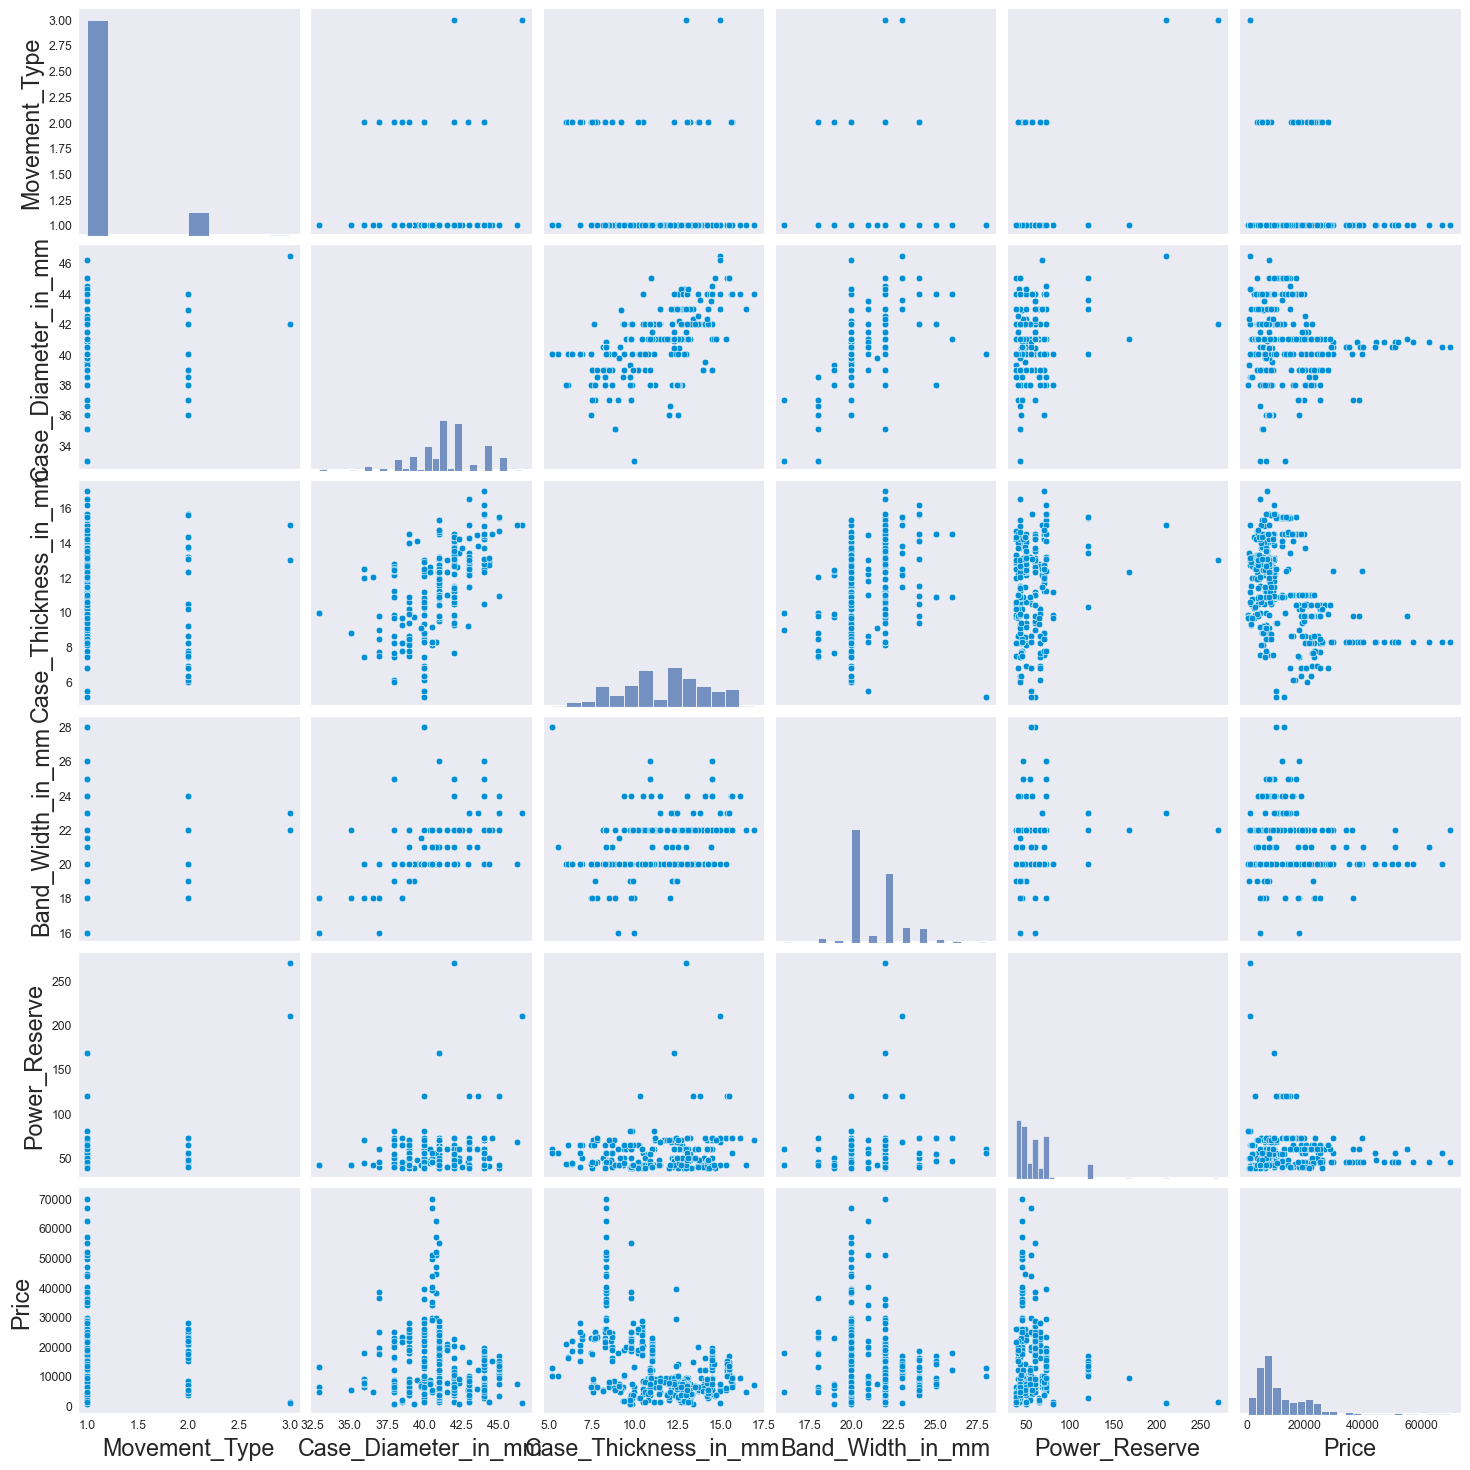

In [156]:
sns.pairplot(data=wt)
plt.xticks(rotation=90)
plt.show()

In [12]:
wt.dropna(inplace=True)

#  <CENTER>UNIVARIATE ANALYSIS

## Kde Plot
.

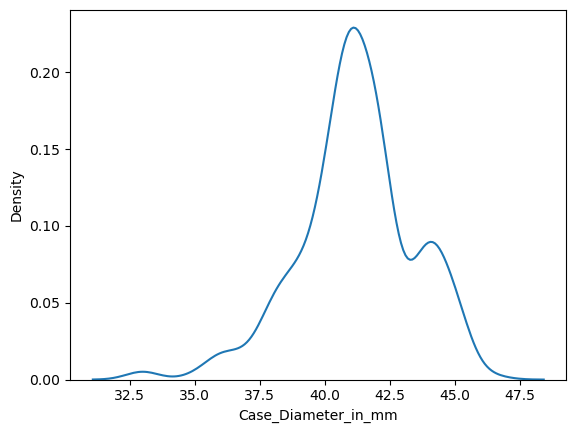

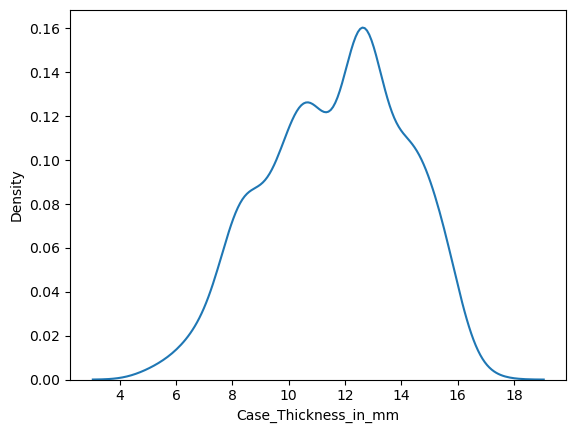

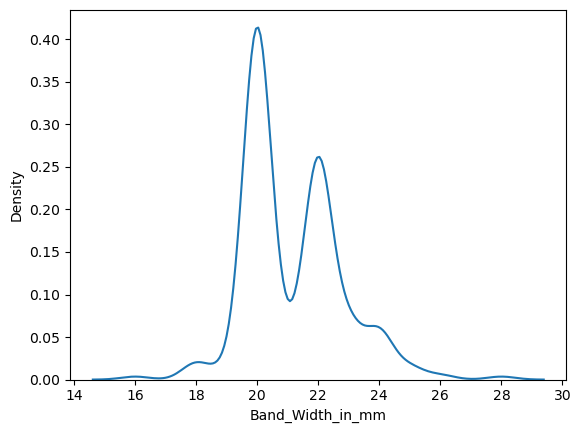

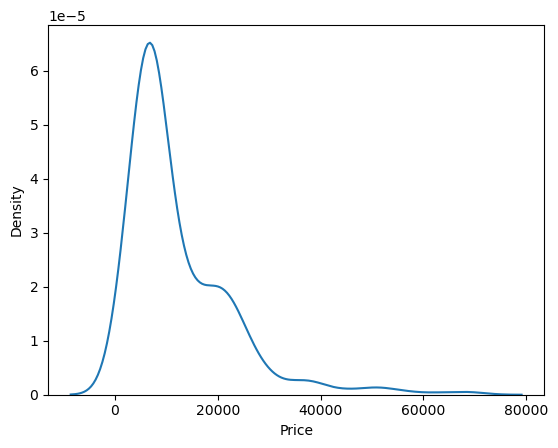

In [21]:
for i in wt.columns:
    if wt[i].dtype!='object':
        sns.kdeplot(x=wt[i])
        plt.show()

## hist Plot
.

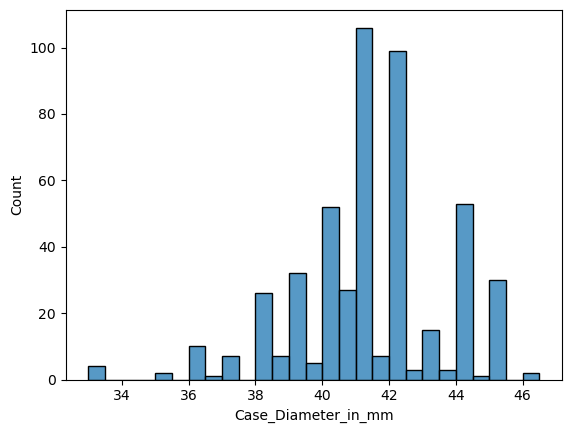

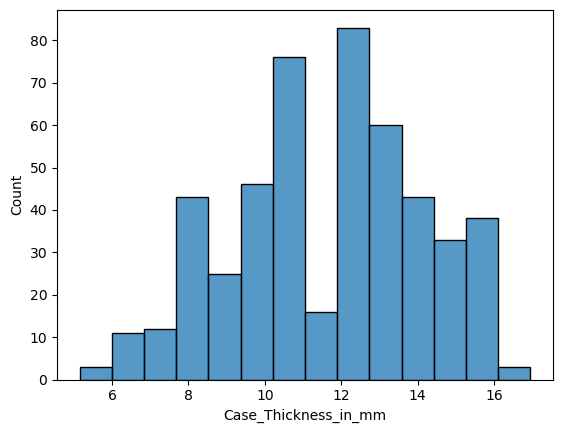

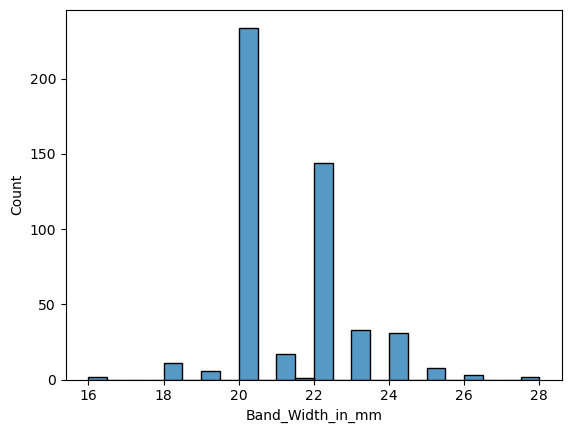

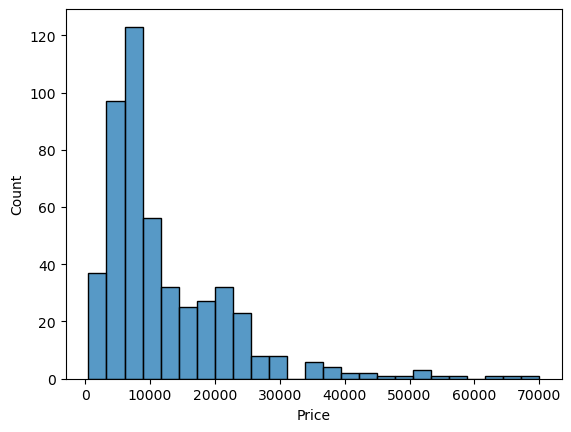

In [22]:
for i in wt.columns:
    if wt[i].dtype!='object':
        sns.histplot(wt[i])
        plt.show()

## Box Plot
.

In [ ]:
# SHOWING BOXPLOT AND FINDING OUTLAIRS

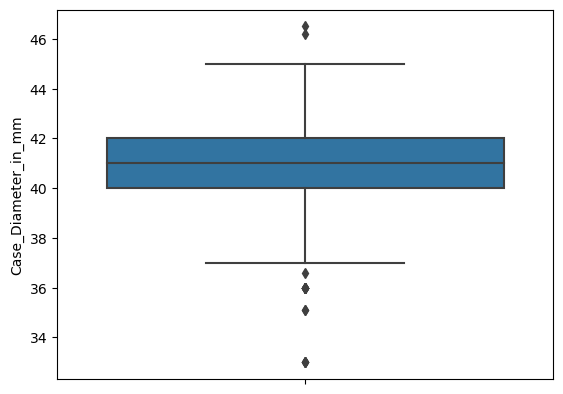

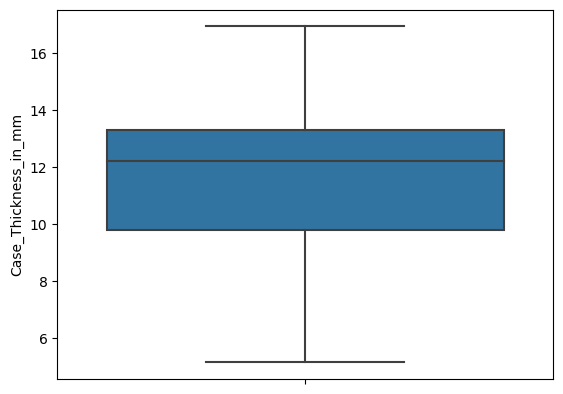

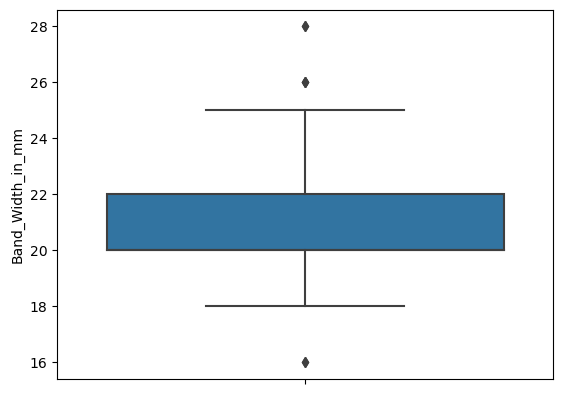

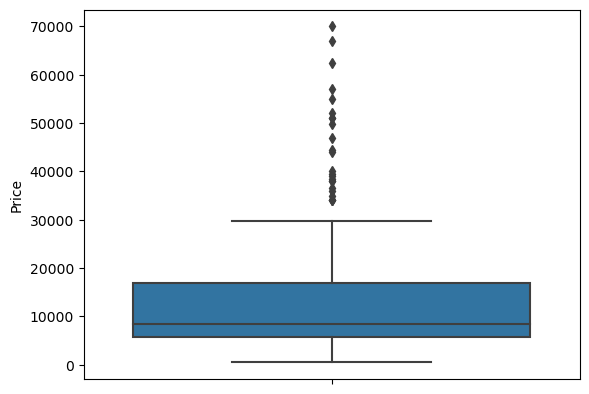

In [23]:
for i in wt.columns:
    if wt[i].dtype!='object':
        sns.boxplot(y=wt[i])
        plt.show()

## OUTLAIR TREATMENT
.

In [ ]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [ ]:
for column in df.columns:
     if df[column].dtype !='object':
            UL,LL=outlier_limit(df[column])
            df[column]=np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])
       

In [ ]:
# DROPING OUTLAIR NAN VALUES AFTER TREATMENT

In [242]:
wt.dropna(inplace=True)

## LABEL ENCODER
.

In [243]:
# Label encoding the related values to fit a commen arrey to increes the accuracy of ML

In [244]:
la=LabelEncoder()

In [245]:
wt['Power_Reserve']=la.fit_transform(wt['Power_Reserve'])

In [246]:
wt.Band_Width_in_mm.fillna(wt.Band_Width_in_mm.mean(),inplace=True)

In [247]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 506
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 492 non-null    object 
 1   Model                 492 non-null    object 
 2   Case_Material         492 non-null    object 
 3   Strap_Material        492 non-null    object 
 4   Movement_Type         492 non-null    int32  
 5   Water_Resistance      492 non-null    object 
 6   Case_Diameter_in_mm   492 non-null    float64
 7   Case_Thickness_in_mm  492 non-null    float64
 8   Band_Width_in_mm      492 non-null    float64
 9   Dial_Color            492 non-null    object 
 10  Crystal_Material      492 non-null    object 
 11  Complications         492 non-null    object 
 12  Power_Reserve         492 non-null    int64  
 13  Price                 492 non-null    int32  
dtypes: float64(3), int32(2), int64(1), object(8)
memory usage: 53.8+ KB


In [248]:
###changing dtype into int for ML


In [249]:
wt['Power_Reserve']=wt['Power_Reserve'].astype(int)


In [251]:
wt.columns

Index(['Brand', 'Model', 'Case_Material', 'Strap_Material', 'Movement_Type',
       'Water_Resistance', 'Case_Diameter_in_mm', 'Case_Thickness_in_mm',
       'Band_Width_in_mm', 'Dial_Color', 'Crystal_Material', 'Complications',
       'Power_Reserve', 'Price'],
      dtype='object')

In [252]:
la=LabelEncoder()

In [254]:
col=[ 'Brand', 'Model', 'Case_Material', 'Strap_Material','Dial_Color', 'Crystal_Material', 'Complications' ]
wt[col]=wt[col].apply(la.fit_transform)

In [255]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 506
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 492 non-null    int32  
 1   Model                 492 non-null    int32  
 2   Case_Material         492 non-null    int32  
 3   Strap_Material        492 non-null    int32  
 4   Movement_Type         492 non-null    int32  
 5   Water_Resistance      492 non-null    object 
 6   Case_Diameter_in_mm   492 non-null    float64
 7   Case_Thickness_in_mm  492 non-null    float64
 8   Band_Width_in_mm      492 non-null    float64
 9   Dial_Color            492 non-null    int32  
 10  Crystal_Material      492 non-null    int32  
 11  Complications         492 non-null    int32  
 12  Power_Reserve         492 non-null    int32  
 13  Price                 492 non-null    int32  
dtypes: float64(3), int32(10), object(1)
memory usage: 38.4+ KB


In [256]:
wt

,Brand,Model,Case_Material,Strap_Material,Movement_Type,Water_Resistance,Case_Diameter_in_mm,Case_Thickness_in_mm,Band_Width_in_mm,Dial_Color,Crystal_Material,Complications,Power_Reserve,Price
0,27,81,12,11,1,300 meters,40.0,13.00,20.0,0,3,4,8,9500
1,22,76,13,9,1,600 meters,43.5,14.47,21.0,1,3,4,13,5800
2,31,16,12,5,1,100 meters,41.0,13.00,20.0,6,3,0,3,4200
3,7,57,12,11,1,30 meters,43.0,14.25,22.0,0,3,0,17,7900
5,18,71,12,5,2,30 meters,42.9,9.20,20.0,0,3,27,6,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,6,22,4,5,1,30 meters,38.5,8.25,20.0,6,3,4,0,21500
503,5,34,12,2,1,300 meters,45.0,15.50,23.0,0,3,4,20,13500
504,20,51,12,5,1,30 meters,38.5,9.70,20.0,1,3,4,14,1800
505,35,59,12,11,1,150 meters,41.5,11.00,22.0,1,3,4,1,19000


## HEAT MAP

In [257]:
### PLOTING HEAT MAP TO FIND THE RELATION WITH THE TARGET OF OTHER COLUMS 

<AxesSubplot:>

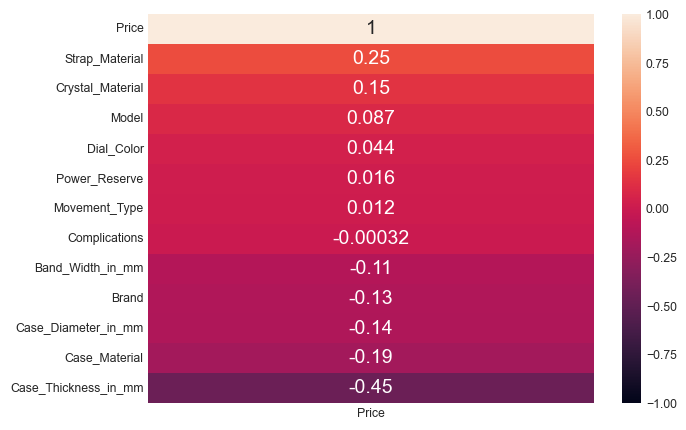

In [258]:
sns.heatmap(wt.corr()[['Price']].sort_values(by='Price',ascending=False),vmax=1,vmin=-1,annot=True)

In [259]:
wt.columns

Index(['Brand', 'Model', 'Case_Material', 'Strap_Material', 'Movement_Type',
       'Water_Resistance', 'Case_Diameter_in_mm', 'Case_Thickness_in_mm',
       'Band_Width_in_mm', 'Dial_Color', 'Crystal_Material', 'Complications',
       'Power_Reserve', 'Price'],
      dtype='object')

## SCALING
.

In [260]:
x=wt[['Strap_Material','Case_Material','Model']].values
y=wt[['Price']].values

In [261]:
sc=StandardScaler()

In [262]:
x=sc.fit_transform(x)

In [263]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## MODEL BULDING
.

In [264]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'LinearSVR':LinearSVR(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [265]:
for name,model in models.items():
    scores=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)
    print('cross_validation model:{}'.format(name))
    rmse=np.sqrt(-scores)
    rmse_avrg=np.mean(rmse)
    print('avg rmse:',rmse_avrg)
    print('-'*100)
    

cross_validation model:LinearRegression
avg rmse: 9695.7044363832
----------------------------------------------------------------------------------------------------
cross_validation model:Ridge
avg rmse: 9695.698085041964
----------------------------------------------------------------------------------------------------
cross_validation model:LinearSVR
avg rmse: 15676.076057888597
----------------------------------------------------------------------------------------------------
cross_validation model:DecisionTreeRegressor
avg rmse: 4197.8400614899565
----------------------------------------------------------------------------------------------------
cross_validation model:AdaBoostRegressor
avg rmse: 6140.270898664576
----------------------------------------------------------------------------------------------------
cross_validation model:GradientBoostingRegressor
avg rmse: 4201.014281675727
------------------------------------------------------------------------------------------

In [266]:
# SELECTING MODEL THAT WHICH HAVE THE BEST LOW RMSE

In [267]:
model=DecisionTreeRegressor()

In [268]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

## PREDICTING
.

In [269]:
y_pred=model.predict(x)

In [270]:
OUT=pd.DataFrame(zip(y,y_pred),columns=('actual','prediction'),dtype=float)

In [271]:
OUT

,actual,prediction
0,9500.0,9500.000000
1,5800.0,5800.000000
2,4200.0,4200.000000
3,7900.0,7900.000000
4,5500.0,5500.000000
...,...,...
487,21500.0,20600.000000
488,13500.0,12900.000000
489,1800.0,1737.500000
490,19000.0,19136.363636


## SCATER PLOT

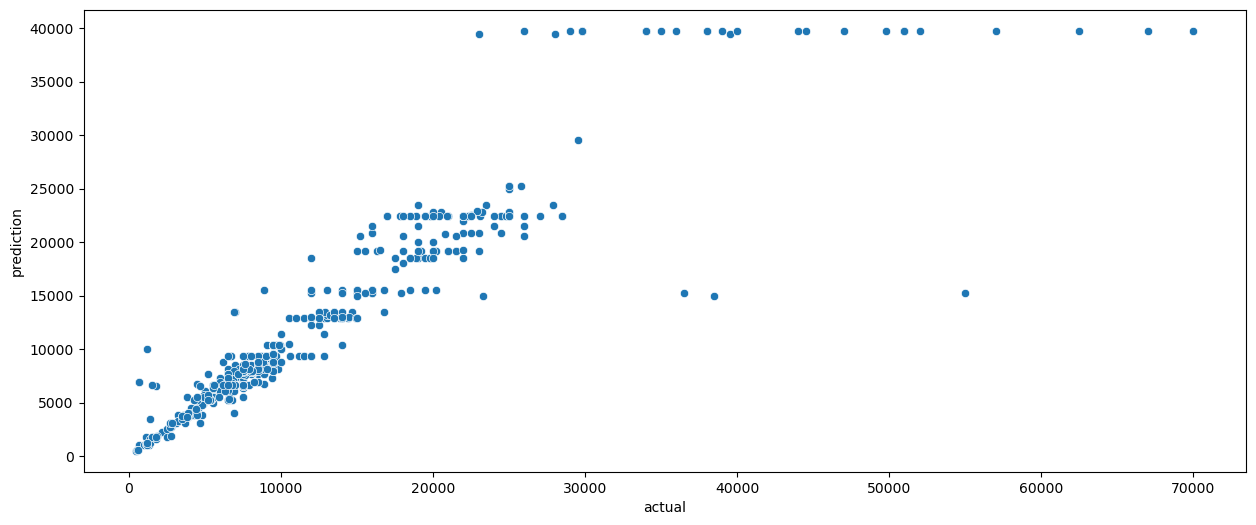

In [54]:

plt.figure(figsize=(15,6))
sns.scatterplot(data=OUT,x='actual',y='prediction')
plt.show()

In [272]:
model.score(x,y)

0.8191164714191819

## LINE PLOT
.

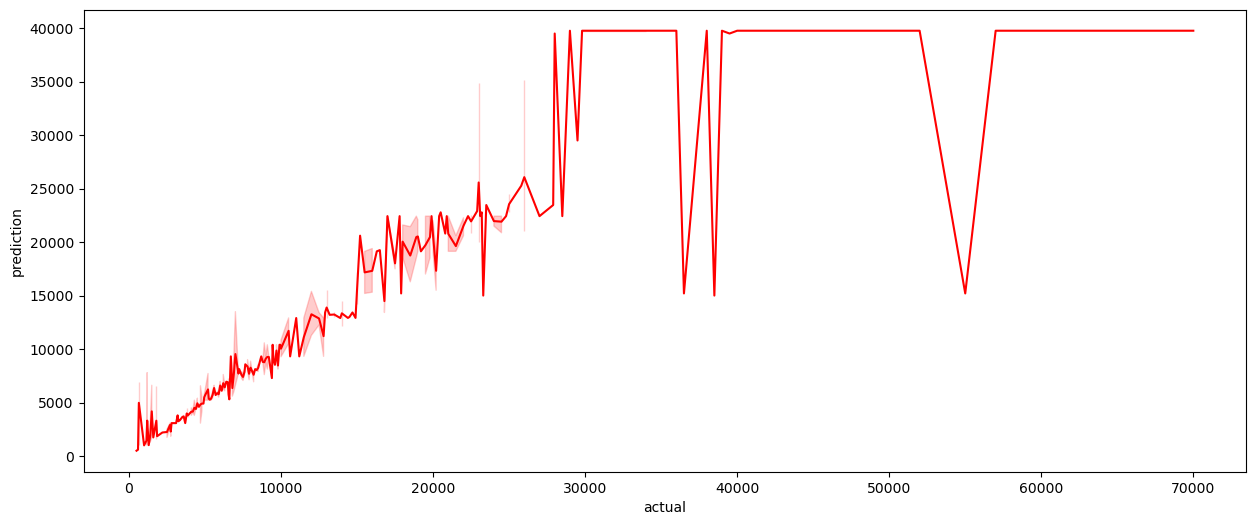

In [55]:

plt.figure(figsize=(15,6))
sns.lineplot(data=OUT,x='actual',y='prediction',color='red')
plt.show()

In [294]:
model.score(x,y)

0.8191164714191819